Question 16.1.1: Euclidean Distance Function
- Implement Euclidean distance functions to calculate the distance between two data points

In [1]:
def euclidean_dist(data1, data2):
    """
    Computes the Euclidean distance between two data points.
    """
    return sum((x - y) ** 2 for x, y in zip(data1, data2)) ** 0.5


16.1.2: Manhattan Distance Function

In [2]:
def manhattan(data1, data2):
    """
    Computes the Manhattan distance between two data points.
    """
    return sum(abs(x - y) for x, y in zip(data1, data2))


16.1.3: Predicting Using KNN
- Generate sample data, compute the distances of neighbors for a test sample using Euclidean distance, and predict the target.

In [3]:
from sklearn.datasets import make_classification

# Generate sample data
X_train, y_train = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, n_classes=2)
X_test = [[0.5, -1.5]]  # Sample test data

# Calculate Euclidean distances
distances = [(euclidean_dist(X_test[0], X_train[i]), y_train[i]) for i in range(len(X_train))]
distances.sort()  # Sort by distance

# Display distances
for i, (dist, label) in enumerate(distances[:5]):  # Display top 5 neighbors
    print(f"Neighbor {i+1}: Distance={dist:.4f}, Label={label}")

# Predict the majority label
k = 5
neighbors = [label for _, label in distances[:k]]
predicted_label = max(set(neighbors), key=neighbors.count)
print(f"Predicted Label: {predicted_label}")


Neighbor 1: Distance=0.3718, Label=1
Neighbor 2: Distance=0.4437, Label=1
Neighbor 3: Distance=0.5183, Label=1
Neighbor 4: Distance=0.6598, Label=1
Neighbor 5: Distance=0.8870, Label=1
Predicted Label: 1


16.2: Plot Accuracy vs Number of Neighbors
- Evaluate KNN accuracy with varying k values and visualize the results in a plot.

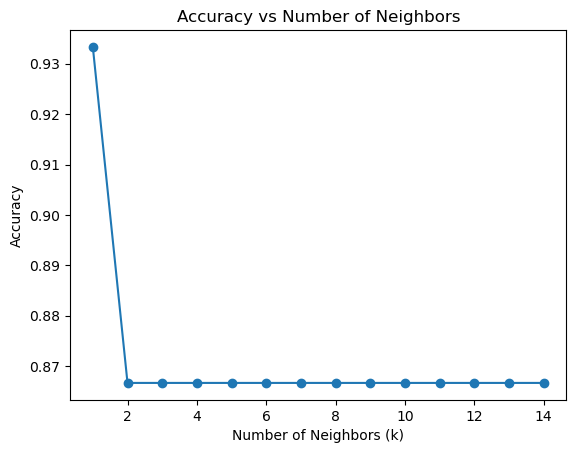

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

accuracies = []
k_values = range(1, 15)

for k in k_values:
    predictions = []
    for test_point in X_val:
        distances = [(euclidean_dist(test_point, X_train[i]), y_train[i]) for i in range(len(X_train))]
        distances.sort()
        neighbors = [label for _, label in distances[:k]]
        predictions.append(max(set(neighbors), key=neighbors.count))
    accuracies.append(accuracy_score(y_val, predictions))

# Plot
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors")
plt.show()


16.3: Using Manhattan Distance
- Predict for X_test using Manhattan distance, 
- compute neighbor distances, 
- determine the target value, 
- followed by a plot of accuracy vs. the number of neighbors using Manhattan distance.



In [5]:
# Compute Manhattan distances for X_test
distances = [(manhattan(X_test[0], X_train[i]), y_train[i]) for i in range(len(X_train))]
distances.sort()  # Sort by distance

# Display distances and predict the majority label
k = 5
neighbors = [label for _, label in distances[:k]]
predicted_label = max(set(neighbors), key=neighbors.count)

print("Using Manhattan Distance:")
for i, (dist, label) in enumerate(distances[:5]):
    print(f"Neighbor {i+1}: Distance={dist:.4f}, Label={label}")
print(f"Predicted Label: {predicted_label}")


Using Manhattan Distance:
Neighbor 1: Distance=0.4398, Label=1
Neighbor 2: Distance=0.5558, Label=1
Neighbor 3: Distance=0.9198, Label=1
Neighbor 4: Distance=1.4229, Label=1
Neighbor 5: Distance=1.4358, Label=0
Predicted Label: 1


16.3 Plot Accuracy vs. Number of Neighbors (Manhattan)

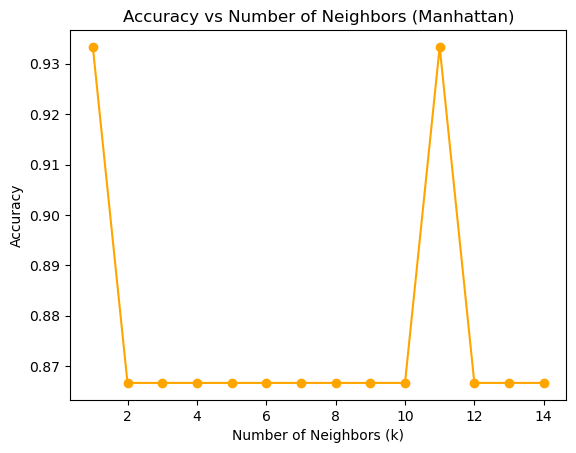

In [6]:
accuracies = []
for k in range(1, 15):
    predictions = []
    for test_point in X_val:
        distances = [(manhattan(test_point, X_train[i]), y_train[i]) for i in range(len(X_train))]
        distances.sort()
        neighbors = [label for _, label in distances[:k]]
        predictions.append(max(set(neighbors), key=neighbors.count))
    accuracies.append(accuracy_score(y_val, predictions))

# Plot
plt.plot(range(1, 15), accuracies, marker='o', color='orange')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Neighbors (Manhattan)")
plt.show()


17.1.1
- Create bootstrap samples, train a decision tree for each sample, and store the models.
- This involves splitting the data, creating bootstrap samples (random samples with replacement), training individual decision trees, and storing them in a list.

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Size of each bootstrap sample (20% of training data)
sample_size = int(0.2 * len(X_train))

# Store trained models
list_models = []

# Number of decision trees
no_classifiers = 10

# Train each model on a bootstrap sample
for _ in range(no_classifiers):
    # Create a bootstrap sample
    indices = np.random.choice(len(X_train), size=sample_size, replace=True)
    X_sample, y_sample = X_train[indices], y_train[indices]
    
    # Train a Decision Tree on the sample
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_sample, y_sample)
    
    # Add the trained model to the list
    list_models.append(model)


17.1.2
- Make predictions using each model and compute final predictions using majority voting.
- Each model predicts on X_test, and the final prediction is determined by majority voting across all models.


In [8]:
# Collect predictions from all models
predictions = []

for model in list_models:
    preds = model.predict(X_test)
    predictions.append(preds)

# Transpose the predictions array for majority voting
predictions = np.array(predictions).T

# Perform majority voting for final predictions
final_predictions = []
for pred_set in predictions:
    most_common = Counter(pred_set).most_common(1)[0][0]
    final_predictions.append(most_common)

# Evaluate accuracy
accuracy = accuracy_score(y_test, final_predictions)
print("Final Predictions:", final_predictions)
print("Accuracy:", accuracy)


Final Predictions: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
Accuracy: 1.0


17.2 Plot Accuracy vs Number of Classifiers
- Evaluate how accuracy changes as the number of classifiers increases.
- By incrementally increasing the number of decision trees, we observe how the ensemble's performance improves.

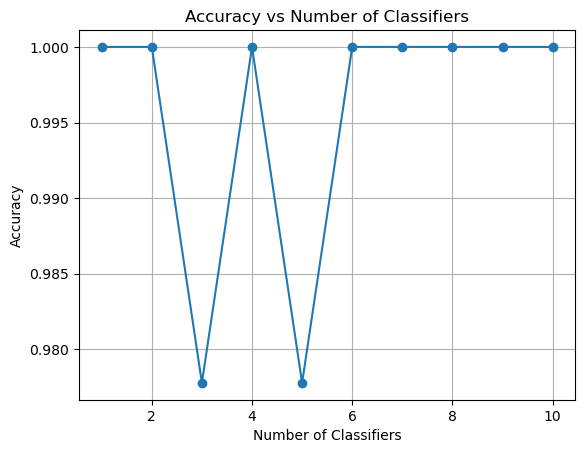

In [9]:
import matplotlib.pyplot as plt

# Function to calculate accuracy for varying numbers of classifiers
accuracies = []

for n_classifiers in range(1, no_classifiers + 1):
    # Use only the first `n_classifiers` models
    sub_predictions = predictions[:, :n_classifiers].T

    # Perform majority voting
    final_preds = []
    for pred_set in sub_predictions.T:
        most_common = Counter(pred_set).most_common(1)[0][0]
        final_preds.append(most_common)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, final_preds)
    accuracies.append(acc)

# Plot accuracy vs number of classifiers
plt.plot(range(1, no_classifiers + 1), accuracies, marker='o')
plt.xlabel('Number of Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Classifiers')
plt.grid()
plt.show()


17.3 Using Another Classifier
- Replace the decision tree classifier with another classifier and repeat the steps.
- To demonstrate flexibility, we use the KNeighborsClassifier instead of DecisionTreeClassifier.

Final Predictions with KNN: [1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0]
Accuracy with KNN: 1.0


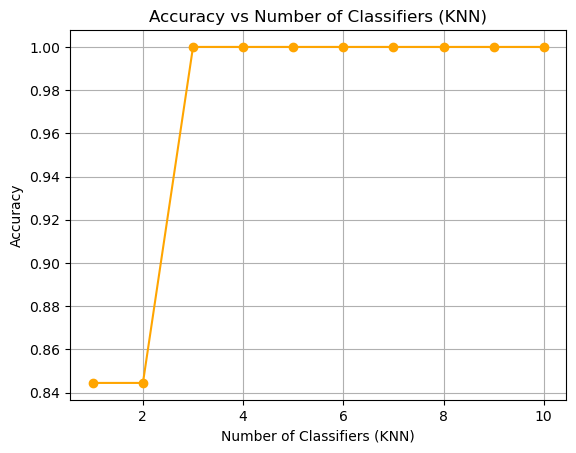

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Replace Decision Tree with KNeighborsClassifier
list_models_knn = []

for _ in range(no_classifiers):
    indices = np.random.choice(len(X_train), size=sample_size, replace=True)
    X_sample, y_sample = X_train[indices], y_train[indices]
    
    # Train a KNeighborsClassifier on the sample
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_sample, y_sample)
    list_models_knn.append(knn_model)

# Make predictions using KNN classifiers
predictions_knn = []

for model in list_models_knn:
    preds = model.predict(X_test)
    predictions_knn.append(preds)

# Transpose and perform majority voting
predictions_knn = np.array(predictions_knn).T
final_predictions_knn = []

for pred_set in predictions_knn:
    most_common = Counter(pred_set).most_common(1)[0][0]
    final_predictions_knn.append(most_common)

# Evaluate accuracy
accuracy_knn = accuracy_score(y_test, final_predictions_knn)
print("Final Predictions with KNN:", final_predictions_knn)
print("Accuracy with KNN:", accuracy_knn)

# Plot accuracy vs number of classifiers for KNN
accuracies_knn = []

for n_classifiers in range(1, no_classifiers + 1):
    sub_predictions_knn = predictions_knn[:, :n_classifiers].T

    final_preds_knn = []
    for pred_set in sub_predictions_knn.T:
        most_common = Counter(pred_set).most_common(1)[0][0]
        final_preds_knn.append(most_common)
    
    acc_knn = accuracy_score(y_test, final_preds_knn)
    accuracies_knn.append(acc_knn)

plt.plot(range(1, no_classifiers + 1), accuracies_knn, marker='o', color='orange')
plt.xlabel('Number of Classifiers (KNN)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Classifiers (KNN)')
plt.grid()
plt.show()


18.1.1 
- Create Training Data
- Define your custom dataset or use an existing one like Iris. Here, we'll use a simple synthetic dataset for demonstration.

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import matplotlib.pyplot as plt

# Define synthetic dataset
X_train = np.array([[1], [2], [3], [4], [5]]).astype(float)  # Feature
Y_train = np.array([5, 7, 9, 11, 13]).astype(float)  # Target

# Display the training data
print("Training Data (X_train):", X_train.flatten())
print("Training Data (Y_train):", Y_train)


Training Data (X_train): [1. 2. 3. 4. 5.]
Training Data (Y_train): [ 5.  7.  9. 11. 13.]


18.1.2: 
- Initial Weak Classifier 
ℎ
0
 
- Compute the mean of 
𝑦
𝑖 as the first weak classifier, 
ℎ
0 , and initialize the ensemble 
𝐻0=
{
ℎ
0
}
.

In [12]:
# Compute mean of Y_train as h_0
h_0 = np.mean(Y_train)

# Initialize ensemble H^0 with h_0
H = [h_0]
print("Initial weak classifier (h_0):", h_0)


Initial weak classifier (h_0): 9.0


18.1.3
- Compute Residuals
- For each data point, compute residuals 
𝑟
𝑖 , which represent the difference between actual values and predicted values by the current ensemble 
𝐻
𝑡
−
1 .

18.1.4
- Train New Weak Classifier 
ℎ
𝑡
 
- Fit a new weak classifier 
ℎ
𝑡 using the residuals as the target variable, visualize the tree, and compute updated predictions.

18.1.5
- Ensemble Stopping Condition
- Use the stopping condition 
∑ 
i=1
n
​ 
( r 
i 
​ )(
 h 
t 
​ )
 (x 
i 
​ 
 )<0. If met, continue; otherwise, stop and finalize the ensemble 
𝐻
𝑡
−1.

In [13]:
T = 3  # Total number of iterations/classifiers
residuals = []

# Sequentially add weak learners
for t in range(1, T):
    # Compute predictions from the current ensemble
    y_pred_t_minus_1 = H[0] + sum(
        model.predict(X_train) if isinstance(model, DecisionTreeRegressor) else 0
        for model in H[1:]
    )
    
    # Compute residuals
    r_i = Y_train - y_pred_t_minus_1
    residuals.append(r_i)
    print(f"Step {t}: Residuals (r_i):", r_i)
    
        # Train DecisionTreeRegressor on residuals
    weak_learner = DecisionTreeRegressor(max_depth=1, random_state=42)
    weak_learner.fit(X_train, r_i)
    H.append(weak_learner)
    
    # Visualize the weak learner
    tree_text = export_text(weak_learner, feature_names=["X"])
    print(f"Weak Learner (h_t) at step {t}:\n", tree_text)
    
    # Update predictions
    y_pred_t = y_pred_t_minus_1 + weak_learner.predict(X_train)
    print(f"Step {t}: Updated Predictions (y_pred_t):", y_pred_t)
    
        # Compute loss term for stopping condition
    loss_term = np.sum(r_i * weak_learner.predict(X_train))
    print(f"Step {t}: Loss Term (Σ[r_i * h_t(x_i)]):", loss_term)
    
    if loss_term >= 0:
        print("Stopping condition met.")
        break




Step 1: Residuals (r_i): [-4. -2.  0.  2.  4.]
Weak Learner (h_t) at step 1:
 |--- X <= 2.50
|   |--- value: [-3.00]
|--- X >  2.50
|   |--- value: [2.00]

Step 1: Updated Predictions (y_pred_t): [ 6.  6. 11. 11. 11.]
Step 1: Loss Term (Σ[r_i * h_t(x_i)]): 30.0
Stopping condition met.
